In [55]:
import cantera as ct
import numpy as np
gas = ct.Solution('Hong_new_original_reactions.cti')
print(gas.reaction_equations()[6])
print(gas.reaction_equations()[7])
#OH + H2O2 <=> HO2 + H2O

H2O2 + OH <=> H2O + HO2
H2O2 + OH <=> H2O + HO2


In [56]:
k = []
for Temp in np.arange(200,2400):
    gas.TPX = Temp, 101325,{'Ar':1}
    k1 = gas.forward_rate_constants[6]*1000
    k2 = gas.forward_rate_constants[7]*1000
    k.append(k1+k2)
xdata = np.arange(200,2400)
ydata = np.log(np.array(k))

[ 9.26607389e+04  2.43094373e+00 -1.33465323e+03]


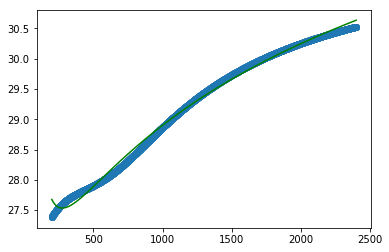

In [57]:

#fitting sigmas 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
def func(x, A,n,Ea):
    return np.log(A)+np.log(x)*n + (-Ea/(1.987*x))
plt.scatter(xdata, ydata,label='data')
popt, pcov = curve_fit(func, xdata, ydata,maxfev=1000000)
print(popt)
test_array = []
for T in xdata:
    test_array.append(np.log(popt[0]*T**popt[1]*np.exp(-popt[2]/(1.987*T))))
plt.plot(xdata,test_array,'g',)    


In [ ]:
[ 9.26607389e+04  2.43094373e+00 -1.33465323e+03]

In [59]:
import cantera as ct
import numpy as np
gas = ct.Solution('Hong_new_original_reactions.cti')
print(gas.reaction_equations()[9])
print(gas.reaction_equations()[10])


2 HO2 <=> H2O2 + O2
2 HO2 <=> H2O2 + O2


In [60]:
k = []
for Temp in np.arange(200,2400):
    gas.TPX = Temp, 101325,{'Ar':1}
    k1 = gas.forward_rate_constants[9]*1000
    k2 = gas.forward_rate_constants[10]*1000
    k.append(k1+k2)
xdata = np.arange(200,2400)
ydata = np.log(np.array(k))

In [45]:
gas2 = ct.Solution('Hong_new.cti')
k_new = []
for Temp in np.arange(200,2400):
    gas2.TPX = Temp, 101325,{'Ar':1}
    k1 = gas2.forward_rate_constants[8]*1000
    k_new.append(k1)

[ 2.33005575e-07  5.84497850e+00 -5.91336719e+03]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


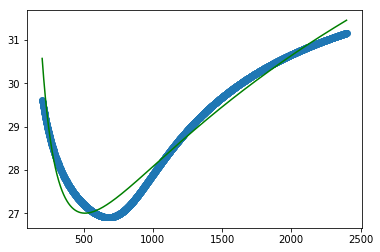

In [61]:

#fitting sigmas 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
def func(x, A,n,Ea):
    return np.log(A)+np.log(x)*n + (-Ea/(1.987*x))
plt.scatter(xdata, ydata,label='data')
popt, pcov = curve_fit(func, xdata, ydata,maxfev=1000000)
print(popt)
test_array = []
for T in xdata:
    test_array.append(np.log(popt[0]*T**popt[1]*np.exp(-popt[2]/(1.987*T))))
plt.plot(xdata,test_array,'g',)    
#plt.plot(xdata,np.log(np.array(k_new)),'r--')

In [50]:
gas2 = ct.Solution('Hong_new.cti')
gas.reaction_equations()

['H + O2 <=> O + OH',
 'H + O2 (+M) <=> HO2 (+M)',
 'H + O2 (+AR) <=> HO2 (+AR)',
 'H + O2 (+O2) <=> HO2 (+O2)',
 'H + O2 (+H2O) <=> HO2 (+H2O)',
 'H2O2 (+M) <=> 2 OH (+M)',
 'H2O2 + OH <=> H2O + HO2',
 'HO2 + OH <=> H2O + O2',
 '2 HO2 <=> H2O2 + O2',
 '2 HO2 <=> H2O2 + O2',
 'H2O + M <=> H + OH + M',
 '2 H2O <=> H + H2O + OH',
 '2 OH <=> H2O + O',
 'H2 + O <=> H + OH',
 'H2 + O <=> H + OH',
 'H2 + OH <=> H + H2O',
 'H + HO2 <=> 2 OH',
 'H + HO2 <=> H2O + O',
 'H + HO2 <=> H2 + O2',
 'HO2 + O <=> O2 + OH',
 'H + H2O2 <=> H2 + HO2',
 'H + H2O2 <=> H2O + OH',
 'H2O2 + O <=> HO2 + OH',
 'H2 + M <=> 2 H + M',
 '2 H2 <=> 2 H + H2',
 'H2 + N2 <=> 2 H + N2',
 'H2 + O2 <=> 2 H + O2',
 '2 O + M <=> O2 + M',
 'AR + 2 O <=> AR + O2',
 'H + O + M <=> OH + M']

In [89]:
# fitting reaction 
A1 = 9.3e-9 * 6.02214076e23
A2 = 1.13e-12 * 6.02214076e23
Ea1 = 1.9873*3.5
Ea2 = 1.987*84
n1 = -1.04
n2 = .303
xdata = np.arange(200,2400,50)
ydata = []
for temp in np.arange(200,2400,50):
    k1 = A1*(temp**n1)*np.exp(Ea1/(1.987*temp))
    k2 = A2*(temp**n2)*np.exp(Ea2/(1.987*temp))

    ydata.append(k1+k2)
A1 = 9.3e-9 
A2 = 1.13e-12 
Ea1 = 3.5
Ea2 = 84
n1 = -1.04
n2 = .303    
ydata = []
for temp in np.arange(200,2400,50):
    k1 = (A1 * (T**n1)*np.exp(Ea1/temp))* 6.02214076e23
    k2 = (A2 * (T**n2)*np.exp(Ea2/temp))* 6.02214076e23

    ydata.append(k1+k2)
    

[ 8.72171090e+12  2.51460688e-03 -1.43391811e+02]


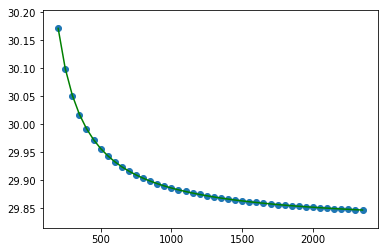

In [93]:
#fitting sigmas 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
def func(x, A,n,Ea):
    return np.log(A)+np.log(x)*n + (-Ea/(1.987*x))
plt.scatter(xdata, np.log(ydata),label='data')
popt, pcov = curve_fit(func, xdata, np.log(ydata),maxfev=1000000,p0=(1e-12,1,1000))
print(popt)
test_array = []
for T in xdata:
    test_array.append(np.log(popt[0]*T**popt[1]*np.exp(-popt[2]/(1.987*T))))
plt.plot(xdata,test_array,'g',)  

In [98]:
# fitting reaction 
A = 1.4e8 * 6.02214076e23
Ea1 = -26322
n = -4.57
xdata = np.arange(200,2400,50)
ydata = []
for temp in np.arange(200,2400,50):
    k1 = A1*(temp**n1)*np.exp(Ea1/(temp))

    ydata.append(k1)



[ 9.3000000e-09 -1.0400000e+00  5.2301814e+04]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


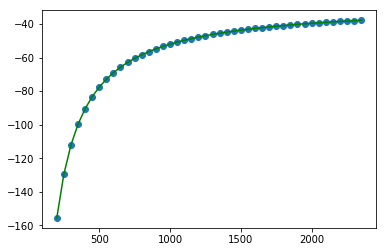

In [99]:
#fitting sigmas 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
def func(x, A,n,Ea):
    return np.log(A)+np.log(x)*n + (-Ea/(1.987*x))
plt.scatter(xdata, np.log(ydata),label='data')
popt, pcov = curve_fit(func, xdata, np.log(ydata),maxfev=1000000,p0=(1e12,1,1000))
print(popt)
test_array = []
for T in xdata:
    test_array.append(np.log(popt[0]*T**popt[1]*np.exp(-popt[2]/(1.987*T))))
plt.plot(xdata,test_array,'g',)  